In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Step 1: Loading the Dataset
from google.colab import files


uploaded = files.upload()

Saving Test Dataset.csv to Test Dataset.csv


In [28]:
from google.colab import files
uploaded = files.upload()

Saving Training Dataset.csv to Training Dataset (1).csv


In [5]:
#2. Explore the Data
# View basic info and statistics
train_data = pd.read_csv('Training Dataset.csv')
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

In [7]:
test_data = pd.read_csv('Test Dataset.csv')
print(test_data.info())
print(test_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean 

In [8]:
#Step - 3. Handling the missing value
# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [12]:
# Handle missing values in numerical features by filling with median
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numerical_features] = train_data[numerical_features].fillna(train_data[numerical_features].median())
test_data[numerical_features] = test_data[numerical_features].fillna(test_data[numerical_features].median())

# Handle missing values in categorical features by filling with mode
categorical_features = train_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    if feature in test_data.columns: # Check if the feature exists in test_data
        train_data[feature] = train_data[feature].fillna(train_data[feature].mode()[0])
        test_data[feature] = test_data[feature].fillna(test_data[feature].mode()[0])
    else:
        print(f"Warning: Feature '{feature}' not found in test data. Skipping.")


In [13]:
# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [23]:
#Step - 4. Detect and Handle Outliers
from sklearn.ensemble import IsolationForest

# Detect outliers in numerical features
iso_forest = IsolationForest(contamination=0.01)
outliers = iso_forest.fit_predict(train_data[numerical_features])

# Remove outliers
train_data = train_data[outliers != -1]


In [24]:
#Step - 5. Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Identify categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical features
for feature in categorical_features:
    if feature in test_data.columns:  # Check if feature is in test_data
        # Combine unique values from both datasets
        combined_unique_values = pd.concat([train_data[feature], test_data[feature]], axis=0).unique()
        label_encoder.fit(combined_unique_values)

        train_data[feature] = label_encoder.transform(train_data[feature])
        test_data[feature] = label_encoder.transform(test_data[feature])
    else:
        print(f"Warning: Feature '{feature}' not found in test data. Skipping.")  # Inform the user about skipped features


In [25]:
#Step - 6. Feature Scaling
from sklearn.preprocessing import StandardScaler

# Scale numerical features
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])


In [26]:
#Step - 7. Feature Engineering
# Example: Create interaction feature
train_data['Income_CreditScore'] = train_data['ApplicantIncome'] * train_data['Credit_History']
test_data['Income_CreditScore'] = test_data['ApplicantIncome'] * test_data['Credit_History']


In [36]:
#Step - 8. Prepare for Modeling
import pandas as pd
# Load the 'Loan_Status' column from the CSV file
loan_status_df = pd.read_csv(r"Training Dataset.csv" , usecols=['Loan_Status'])

# Add the 'Loan_Status' column to `train_data`
train_data['Loan_Status'] = loan_status_df['Loan_Status']


In [37]:
from sklearn.model_selection import train_test_split

# Check if 'Loan_Status' exists in train_data
if 'Loan_Status' not in train_data.columns:
    raise KeyError("The 'Loan_Status' column is missing in the training data.")

# Separate features and target variable
X = train_data.drop('Loan_Status', axis=1)  # 'Loan_Status' is the target variable
y = train_data['Loan_Status']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


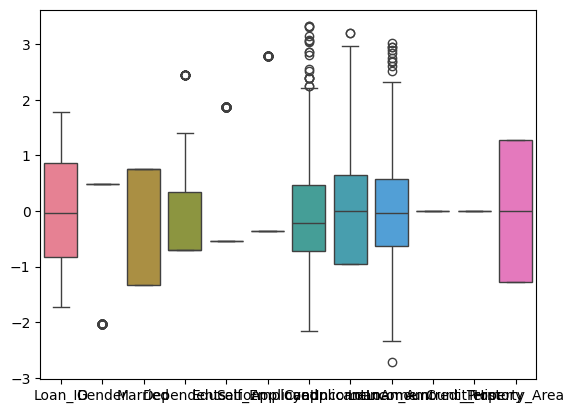

In [38]:
#Step - 9. Visualize Data Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for numerical features
sns.boxplot(data=train_data[numerical_features])
plt.show()


In [39]:
#Step - 10. Generate Predictions
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(test_data)

# Display predictions
print("Sample Predictions:")
print(predictions[:10])


Sample Predictions:
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
